# Tensorflow Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
X,y = fetch_california_housing(return_X_y=True)

In [3]:
X.shape

(20640, 8)

In [4]:
y.shape

(20640,)

In [5]:
X[::5],y[:5]

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   4.0368    ,   52.        ,    4.76165803, ...,    2.13989637,
           37.85      , -122.25      ],
        [   3.2031    ,   52.        ,    5.47761194, ...,    2.26368159,
           37.85      , -122.26      ],
        ...,
        [   4.125     ,   37.        ,    7.28571429, ...,    2.07142857,
           39.12      , -121.52      ],
        [   3.5673    ,   11.        ,    5.93258427, ...,    2.8247191 ,
           39.29      , -121.32      ],
        [   1.5603    ,   25.        ,    5.04545455, ...,    2.56060606,
           39.48      , -121.09      ]]),
 array([4.526, 3.585, 3.521, 3.413, 3.422]))

In [5]:
X_y = np.hstack((X,np.reshape(y,(len(y),1))))

In [6]:
X_y[:,:-1]

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
def create_tf_train_test(X,y,test_prop=0.3,shuffle=False):
    X_y = np.hstack((X,np.reshape(y,(len(y),1))))
    if shuffle:
        X_y = np.random.shuffle(X_y)
    
    train_len = int(X_y.shape[0]*(1-test_prop))
    
    X_y_train,X_y_test = X_y[:train_len,:],X_y[train_len:,:]
    X_tr,X_test,y_tr,y_test = X_y_train[:,:-1],X_y_test[:,:-1],X_y_train[:,-1],X_y_test[:,-1]
    print(X_tr.shape,X_test.shape,y_tr.shape,y_test.shape)
    Xtrain,ytrain = tf.convert_to_tensor(X_tr),tf.convert_to_tensor(y_tr)
    Xtest,ytest = tf.convert_to_tensor(X_test),tf.convert_to_tensor(y_test)
    return Xtrain,Xtest,ytrain,ytest
        

In [8]:
Xtrain,Xtest,ytrain,ytest = create_tf_train_test(X,y)

(14447, 8) (6193, 8) (14447,) (6193,)


In [9]:
Xtrain.shape,ytrain.shape

(TensorShape([14447, 8]), TensorShape([14447]))

In [10]:
tf.random.set_seed(1993)

In [11]:
IN = Xtrain.shape[1]
OUT = 1
EPOCHS = 200
BATCHES = 400
IN,OUT,EPOCHS,BATCHES

(8, 1, 200, 400)

In [12]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (IN,)),
    tf.keras.layers.Dense(units=10,activation = 'relu'),
    tf.keras.layers.Dense(units=10,activation = 'relu'),   
    tf.keras.layers.Dense(1,activation = 'relu')
])

In [13]:
model.layers[0].input_shape

(None, 8)

In [14]:
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),metrics = ['mae'])

In [15]:
model.fit(Xtrain,ytrain,epochs=EPOCHS)

Epoch 1/200
452/452 [==============================] - 0s 740us/step - loss: 57.9622 - mae: 57.9622
Epoch 2/200
452/452 [==============================] - 0s 812us/step - loss: 1.9963 - mae: 1.9963
Epoch 3/200
452/452 [==============================] - 0s 713us/step - loss: 1.9799 - mae: 1.9799
Epoch 4/200
452/452 [==============================] - 0s 769us/step - loss: 1.9734 - mae: 1.9734
Epoch 5/200
452/452 [==============================] - 0s 782us/step - loss: 1.9704 - mae: 1.9704
Epoch 6/200
452/452 [==============================] - 0s 794us/step - loss: 1.9672 - mae: 1.9672
Epoch 7/200
452/452 [==============================] - 0s 776us/step - loss: 1.9636 - mae: 1.9636
Epoch 8/200
452/452 [==============================] - 0s 723us/step - loss: 1.9624 - mae: 1.9624
Epoch 9/200
452/452 [==============================] - 0s 778us/step - loss: 1.9593 - mae: 1.9593
Epoch 10/200
452/452 [==============================] - 0s 677us/step - loss: 1.9528 - mae: 1.9528
Epoch 11/200
452/

In [16]:
y_pred = model.predict(Xtest)
y_pred

array([[3.5776486 ],
       [2.4078946 ],
       [2.995192  ],
       ...,
       [0.67398894],
       [0.7927748 ],
       [0.9301611 ]], dtype=float32)

In [17]:
ytest,y_pred,type(ytest),type(y_pred),ytest.numpy(),ytest.shape,y_pred.shape

(<tf.Tensor: shape=(6193,), dtype=float64, numpy=array([5.00001, 4.5    , 3.324  , ..., 0.923  , 0.847  , 0.894  ])>,
 array([[3.5776486 ],
        [2.4078946 ],
        [2.995192  ],
        ...,
        [0.67398894],
        [0.7927748 ],
        [0.9301611 ]], dtype=float32),
 tensorflow.python.framework.ops.EagerTensor,
 numpy.ndarray,
 array([5.00001, 4.5    , 3.324  , ..., 0.923  , 0.847  , 0.894  ]),
 TensorShape([6193]),
 (6193, 1))

In [18]:
ytest.shape[0],ytest.numpy().reshape((ytest.shape[0],1))

(6193,
 array([[5.00001],
        [4.5    ],
        [3.324  ],
        ...,
        [0.923  ],
        [0.847  ],
        [0.894  ]]))

In [19]:
tf.keras.metrics.MeanAbsoluteError().update_state(ytest.numpy().reshape((ytest.shape[0],1)),y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=6193.0>

In [20]:
ytest.numpy().reshape((ytest.shape[0],1)),y_pred

(array([[5.00001],
        [4.5    ],
        [3.324  ],
        ...,
        [0.923  ],
        [0.847  ],
        [0.894  ]]),
 array([[3.5776486 ],
        [2.4078946 ],
        [2.995192  ],
        ...,
        [0.67398894],
        [0.7927748 ],
        [0.9301611 ]], dtype=float32))

In [21]:
y_pred.sum()

12388.848

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest.numpy().reshape((ytest.shape[0],1)),y_pred)

0.6131793933822529

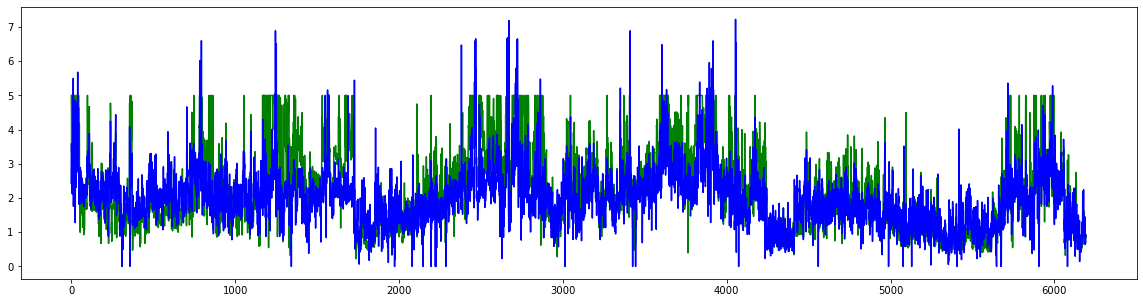

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
#plt.scatter(x = range(ytest.shape[0]),y = ytest.numpy().reshape((ytest.shape[0],1)),color = 'green')
#plt.scatter(x = range(ytest.shape[0]),y = y_pred,color = 'blue')
plt.plot(ytest.numpy().reshape((ytest.shape[0],1)),color = 'green')
plt.plot(y_pred,color = 'blue')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [25]:
Xtrain.shape

TensorShape([14447, 8])

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

In [3]:
train.to_parquet('train.parquet')